In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

%matplotlib inline

TypeError: Image data can not convert to float

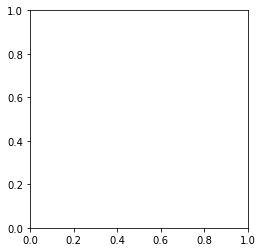

In [11]:
img = cv2.imread('/Users/cravuri/Desktop/Sample.JPG')
plt.imshow(img)
mser = cv2.MSER_create()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
vis = img.copy()

regions = mser.detectRegions(gray, None)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
# cv2.polylines(vis, hulls, 1, (0, 255, 0)) 
# # cv2.putText(vis, str('change'), (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0))
# # cv2.fillPoly(vis, hulls, (0, 255, 0))


# # cv2.imwrite("test.png", vis)    
# plt.imshow(vis)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [10]:
import sys
from PIL import Image, ImageDraw

class Region():
    def __init__(self, x, y):
        self._pixels = [(x, y)]
        self._min_x = x
        self._max_x = x
        self._min_y = y
        self._max_y = y

    def add(self, x, y):
        self._pixels.append((x, y))
        self._min_x = min(self._min_x, x)
        self._max_x = max(self._max_x, x)
        self._min_y = min(self._min_y, y)
        self._max_y = max(self._max_y, y)

    def box(self):
        return [(self._min_x, self._min_y), (self._max_x, self._max_y)]

def find_regions(im):
    width, height  = im.size
    regions = {}
    pixel_region = [[0 for y in range(height)] for x in range(width)]
    equivalences = {}
    n_regions = 0
    #first pass. find regions.
    for x in xrange(width):
        for y in xrange(height):
            #look for a black pixel
            if im.getpixel((x, y)) == (0, 0, 0, 255): #BLACK
                # get the region number from north or west
                # or create new region
                region_n = pixel_region[x-1][y] if x > 0 else 0
                region_w = pixel_region[x][y-1] if y > 0 else 0

                max_region = max(region_n, region_w)

                if max_region > 0:
                    #a neighbour already has a region
                    #new region is the smallest > 0
                    new_region = min(filter(lambda i: i > 0, (region_n, region_w)))
                    #update equivalences
                    if max_region > new_region:
                        if max_region in equivalences:
                            equivalences[max_region].add(new_region)
                        else:
                            equivalences[max_region] = set((new_region, ))
                else:
                    n_regions += 1
                    new_region = n_regions

                pixel_region[x][y] = new_region

    #Scan image again, assigning all equivalent regions the same region value.
    for x in xrange(width):
        for y in xrange(height):
                r = pixel_region[x][y]
                if r > 0:
                    while r in equivalences:
                        r = min(equivalences[r])

                    if not r in regions:
                        regions[r] = Region(x, y)
                    else:
                        regions[r].add(x, y)
image = _get_image(url)
    image.filter(ImageFilter.SHARPEN)
    return pytesseract.image_to_string(image)
    return list(regions.itervalues())

def main():
    im = Image.open("/Users/cravuri/Desktop/Text.JPG")
    regions = find_regions(im)
    draw = ImageDraw.Draw(im)
    for r in regions:
        draw.rectangle(r.box(), outline=(255, 0, 0))
    del draw 
    im.show()
    output = file("output.png", "wb")
    im.save(output)
    output.close()

In [11]:
main()

In [12]:
import pytesseract
from PIL import Image
from PIL import ImageFilter

In [15]:
image = Image.open("/Users/cravuri/Desktop/HackTest/IMG_3291.JPG")
image.filter(ImageFilter.SHARPEN)
text = pytesseract.image_to_string(image)
print text